# Monero Data Analysis 

In [1]:
import zstandard as zstd
import shutil
import os

def decompress_zst(input_file, output_file, max_samples):
    with open(input_file, 'rb') as compressed_file:
        decomp = zstd.ZstdDecompressor()
        with open(output_file, 'wb') as output:
            total_samples = 0
            for chunk in decomp.read_to_iter(compressed_file):
                output.write(chunk)
                total_samples += chunk.count(b'\n')
                if total_samples >= max_samples:
                    break

# List of input files
input_files = ['/Users/shivanipaunikar/Downloads/Project- crypto/Monero/MC.zst', '/Users/shivanipaunikar/Downloads/Project- crypto/Monero/MS.zst']

# Output directory where decompressed files will be stored
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Maximum number of samples you want to use
max_samples = 5000

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through each input file and decompress
for input_file in input_files:
    # Generate the output file path by removing the .zst extension and adding .json
    output_file = os.path.join(output_directory, os.path.splitext(os.path.basename(input_file))[0] + '.json')
    
    print(f"Processing: {input_file}")
    
    # Decompress the input file, limiting to max_samples, and save it to the output file path
    decompress_zst(input_file, output_file, max_samples)
    
    print(f"Completed: {input_file} -> {output_file}")

print("All files processed.")


Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Monero/MC.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Monero/MC.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/MC.json
Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Monero/MS.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Monero/MS.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/MS.json
All files processed.


In [3]:
import pandas as pd
import json
import os

# Define the output directory where the JSON files were decompressed
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Function to fix JSON syntax errors
def fix_json_syntax(input_file, output_file):
    with open(input_file, 'r') as input_json, open(output_file, 'w') as output_json:
        for line in input_json:
            try:
                json_obj = json.loads(line)
                corrected_line = json.dumps(json_obj) + '\n'
                output_json.write(corrected_line)
            except json.JSONDecodeError as e:
                # Handle JSON syntax errors here or simply skip problematic lines
                print(f"Skipping line due to JSON syntax error: {line.strip()}")
                continue

# Specify your input and output file paths for fixing 'Bs.json' syntax
input_file_path_Ms = os.path.join(output_directory, 'MS.json')
output_file_path_Ms = os.path.join(output_directory, 'MS_fixed.json')

# Call the function to fix JSON syntax errors in 'Bs.json'
fix_json_syntax(input_file_path_Ms, output_file_path_Ms)

# Specify your input and output file paths for fixing 'Bc.json' syntax
input_file_path_Mc = os.path.join(output_directory, 'MC.json')
output_file_path_Mc = os.path.join(output_directory, 'MC_fixed.json')

# Call the function to fix JSON syntax errors in 'Bc.json'
fix_json_syntax(input_file_path_Mc, output_file_path_Mc)

# Define a function to read JSON data line by line
def read_json_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield json.loads(line)

# Use os.path.join to construct file paths
submission_data = list(read_json_lines(output_file_path_Ms))  
comment_data = list(read_json_lines(output_file_path_Mc))  

# Create DataFrames
submission_df = pd.DataFrame(submission_data)
comment_df = pd.DataFrame(comment_data)

# Filter for Bitcoin-related data (you may need to adjust the filter)
Monero_submissions = submission_df[submission_df['title'].str.contains('Monero', case=False, na=False)]
Monero_comments = comment_df[comment_df['body'].str.contains('Monero', case=False, na=False)]

# Sample 5000 observations with replacement
Monero_submissions_sample = Monero_submissions.sample(n=5000, replace=True)
Monero_comments_sample = Monero_comments.sample(n=5000, replace=True)

# Export to CSV
Monero_submissions_sample.to_csv('Monero_submissions_sample.csv', index=False)
Monero_comments_sample.to_csv('Monero_comments_sample.csv', index=False)


Skipping line due to JSON syntax error: {"downs":0,"permalink":"/r/Monero/comments/5428y4/who_would_participate_in_a_subreddit_for_buying/","ups":32,"name":"t3_5428y4","locked":false,"link_flair_css_class":null,"retrieved_on":1476443736,"subreddit":"Monero","hide_score":false,"secure_media_embed":{},"domain":"self.Monero","num_comments":10,"saved":false,"author_flair_css_class":null,"id":"5428y4","link_flair_text":null,"score":32,"author":"TheKing01","quarantine":false,"edited":1474593179,"title":"Who would participate in a subreddit for buying and selling things for monero, if it where created?","stickied":false,"created_utc":1474592240,"over_18":false,"selftext":"In lieu of a decentralized system such Open Bazaar, how about we create a subreddit for buying and selling things for Monero? It would be like craigslist, but for monero, and on reddit.\n\nThis would be a regular market, not a dark market.\n\nDigital goods, physical goods through the mail, and services if the its a digital s

In [4]:
# Load the CSV files
Monero_submissions_df = pd.read_csv('Monero_submissions_sample.csv')
Monero_comments_df = pd.read_csv('Monero_comments_sample.csv')


In [5]:
# Display the columns of the DataFrame
print("Columns in Monero_submissions_df:")
print(Monero_submissions_df.columns)

# Display a sample of the DataFrame
print("Sample data in Monero_submissions_df:")
print(Monero_submissions_df.head())

# Repeat the same for Monero_comments_df if needed
print("Columns in Monero_comments_df:")
print(Monero_comments_df.columns)

print("Sample data in Monero_comments_df:")
print(Monero_comments_df.head())


Columns in Monero_submissions_df:
Index(['edited', 'score', 'quarantine', 'stickied', 'from_id', 'from_kind',
       'created', 'subreddit_id', 'secure_media', 'url', 'is_self', 'from',
       'author', 'link_flair_css_class', 'gilded', 'name', 'archived', 'id',
       'author_flair_css_class', 'num_comments', 'over_18', 'saved', 'ups',
       'retrieved_on', 'selftext', 'media', 'link_flair_text', 'permalink',
       'secure_media_embed', 'title', 'thumbnail', 'downs', 'distinguished',
       'hide_score', 'domain', 'author_flair_text', 'created_utc', 'subreddit',
       'media_embed', 'preview', 'post_hint', 'locked', 'contest_mode'],
      dtype='object')
Sample data in Monero_submissions_df:
  edited  score  quarantine  stickied  from_id  from_kind       created  \
0  False      2       False     False      NaN        NaN           NaN   
1  False     23       False     False      NaN        NaN           NaN   
2  False      1       False     False      NaN        NaN           Na

In [6]:
import pandas as pd

# Load the data into DataFrames (assuming you already have them loaded)
Monero_submissions_df = pd.read_csv('Monero_submissions_sample.csv')
Monero_comments_df = pd.read_csv('Monero_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Monero_submissions_df['created_utc'] = pd.to_datetime(Monero_submissions_df['created_utc'], unit='s')
Monero_comments_df['created_utc'] = pd.to_datetime(Monero_comments_df['created_utc'], unit='s')

# Calculate the range of dates available
date_range_submissions = Monero_submissions_df['created_utc'].min(), Monero_submissions_df['created_utc'].max()
date_range_comments = Monero_comments_df['created_utc'].min(), Monero_comments_df['created_utc'].max()

print("Range of dates available in Monero_submissions_df:", date_range_submissions)
print("Range of dates available in Monero_comments_df:", date_range_comments)

# Calculate the number of posts, comments, and authors for each day
posts_per_day_submissions = Monero_submissions_df.groupby(Monero_submissions_df['created_utc'].dt.date).size()
comments_per_day = Monero_comments_df.groupby(Monero_comments_df['created_utc'].dt.date).size()
unique_authors_per_day_submissions = Monero_submissions_df.groupby(Monero_submissions_df['created_utc'].dt.date)['author'].nunique()

# Display the results
print("\nNumber of posts per day in Monero_submissions_df:")
print(posts_per_day_submissions)
print("\nNumber of comments per day in Monero_comments_df:")
print(comments_per_day)
print("\nNumber of unique authors per day in Monero_submissions_df:")
print(unique_authors_per_day_submissions)


Range of dates available in Monero_submissions_df: (Timestamp('2014-04-25 02:25:38'), Timestamp('2016-09-23 00:44:27'))
Range of dates available in Monero_comments_df: (Timestamp('2014-04-29 20:54:23'), Timestamp('2015-06-04 01:04:04'))

Number of posts per day in Monero_submissions_df:
created_utc
2014-04-25     1
2014-05-16     3
2014-05-17     4
2014-05-18     3
2014-05-19     1
              ..
2016-09-19    18
2016-09-20    41
2016-09-21    24
2016-09-22    39
2016-09-23     4
Length: 624, dtype: int64

Number of comments per day in Monero_comments_df:
created_utc
2014-04-29     4
2014-05-13    38
2014-05-14    34
2014-05-15    25
2014-05-16    47
              ..
2015-05-31    12
2015-06-01    51
2015-06-02    27
2015-06-03    18
2015-06-04    10
Length: 281, dtype: int64

Number of unique authors per day in Monero_submissions_df:
created_utc
2014-04-25     1
2014-05-16     1
2014-05-17     2
2014-05-18     1
2014-05-19     1
              ..
2016-09-19     8
2016-09-20    15
201

# Topic Modeling

In [7]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import models
import gensim.corpora as corpora
import gensim

In [8]:
# Load the data into DataFrames (assuming you already have them loaded)
Monero_submissions_df = pd.read_csv('Monero_submissions_sample.csv')
Monero_comments_df = pd.read_csv('Monero_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Monero_submissions_df['created_utc'] = pd.to_datetime(Monero_submissions_df['created_utc'], unit='s')
Monero_comments_df['created_utc'] = pd.to_datetime(Monero_comments_df['created_utc'], unit='s')

# Combine comments and submissions text
Monero_text = Monero_submissions_df['selftext'].dropna().tolist() + Monero_comments_df['body'].dropna().tolist()


In [9]:
# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

Monero_text = [preprocess_text(text) for text in Monero_text]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)

In [12]:
# Apply TF-IDF vectorization
Litecoin_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in Monero_text])

In [13]:
pip install gensim matplotlib pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [14]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Assuming you have a list of preprocessed tokens called 'bitcoin_text'
# You can replace 'bitcoin_text' with your actual data
dictionary = Dictionary([tokens for tokens in Monero_text])
corpus = [dictionary.doc2bow(tokens) for tokens in Monero_text]

# Perform LDA topic modeling
lda_model_Monero = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=2)


In [16]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_Monero, texts=Monero_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.4f}')


Coherence Score: 0.2993


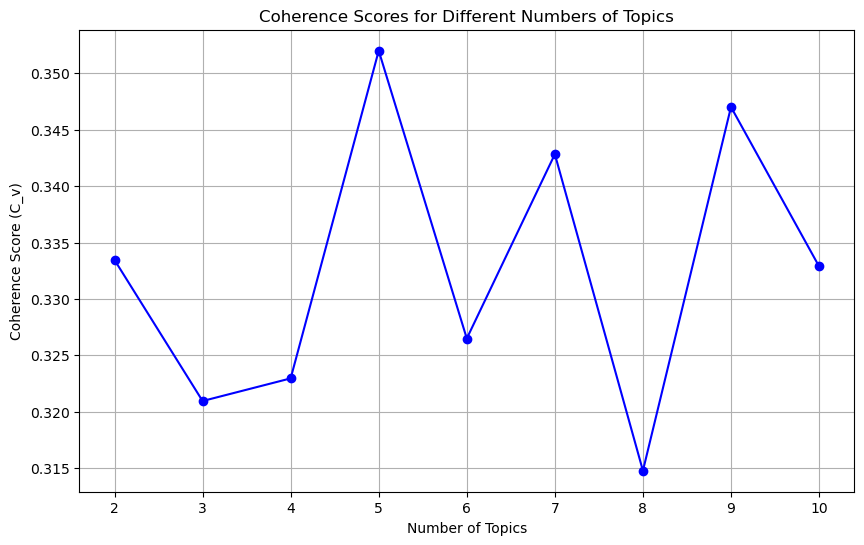

In [17]:
# Define a range of topic numbers to test
topics_range = range(2, 11)
coherence_scores = []

# Calculate coherence scores for different numbers of topics
for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=2)
    coherence_model = CoherenceModel(model=lda_model, texts=Monero_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.xticks(topics_range)
plt.grid(True)
plt.show()


In [18]:
# Print the topics generated by the LDA model
topics = lda_model_Monero.print_topics(num_words=5)  # You can adjust the number of words per topic
for topic in topics:
    print(topic)


(0, '0.039*"gt" + 0.027*"monero" + 0.014*"lt" + 0.009*"wa" + 0.009*"bitcoin"')
(1, '0.033*"monero" + 0.012*"address" + 0.011*"wallet" + 0.011*"coin" + 0.010*"bitcoin"')
(2, '0.019*"monero" + 0.011*"http" + 0.010*"wa" + 0.006*"bitcoin" + 0.005*"would"')
(3, '0.022*"monero" + 0.008*"http" + 0.007*"wa" + 0.007*"work" + 0.007*"ha"')
(4, '0.045*"http" + 0.026*"monero" + 0.013*"bitcoin" + 0.009*"maam" + 0.008*"amp"')


# Sentiment Analysis

In [19]:
from textblob import TextBlob

# Combine Ethereum submissions and comments text into a single list
Monero_text = Monero_submissions_df['selftext'].dropna().tolist() + Monero_comments_df['body'].dropna().tolist()

# Preprocess the text data (if you haven't done this already)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)  # Join tokens into a single string

Monero_text = [preprocess_text(text) for text in Monero_text]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
# Example preprocessing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    
    # Other text cleaning steps (e.g., removing punctuation, stemming) can be added
    
    return " ".join(tokens)  # Convert tokens back to text

# Apply preprocessing to your text data
Monero_comments_df['cleaned_text'] = Monero_comments_df['body'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

In [22]:
# Apply sentiment analysis to your preprocessed text data
sentiments = [get_sentiment(text) for text in Monero_text]


In [23]:
# Create a DataFrame to store sentiments (optional)
sentiments_df = pd.DataFrame({'Sentiment': sentiments})

In [24]:
# Print or analyze the sentiment results as needed
print(sentiments_df['Sentiment'].value_counts())  # Display sentiment counts

neutral     3701
positive    3580
negative     540
Name: Sentiment, dtype: int64


In [25]:
# Assuming you have already performed sentiment analysis and stored results in 'sentiments' list
# Combine both comments and submissions text into a single list
Monero_text = Monero_submissions_df['selftext'].dropna().tolist() + Monero_comments_df['body'].dropna().tolist()


# Print the first few comments and submissions with their sentiments
for i, (text, sentiment) in enumerate(zip(Monero_text, sentiments)):
    if i >= 10:  # Print the first 10 (5 comments + 5 submissions)
        break
    if i < 5:
        print(f"Comment {i + 1}:")
    else:
        print(f"Submission {i - 4}:")
    print("Text:", text)
    print("Sentiment:", sentiment)
    print()


Comment 1:
Text: [deleted]
Sentiment: neutral

Comment 2:
Text: [deleted]
Sentiment: neutral

Comment 3:
Text: The Borromean Rings thread - [bitcoin](http://www.reddit.com/r/Bitcoin/comments/386vh0/borromean_ring_signatures_new_research_by_greg/)/[Wiki](http://en.wikipedia.org/wiki/Borromean_rings) - prompted this idea stream yesterday &amp; today, 1+1+1. 

Using a Mixin 3 is said to sufficiently obfuscate the blueprint of transactions on the blockchain. This characterization of Monero seems just as illustrative of time as it does "money". With a sufficient mixin count, we arrive at continual states of novelty - all the while closing doors behind us. 

Take for example: cohomology, commutator,  Seifert–van Kampen theorem, Massey product, etc. The unknown variables^a are encoded/locked by synthesizing obfuscation^b. As other minds reach these novelty equations, time-binding occurs^c (Korzybski) at the level of conscious awareness. 

Ergo, going "further" in time implies others are going

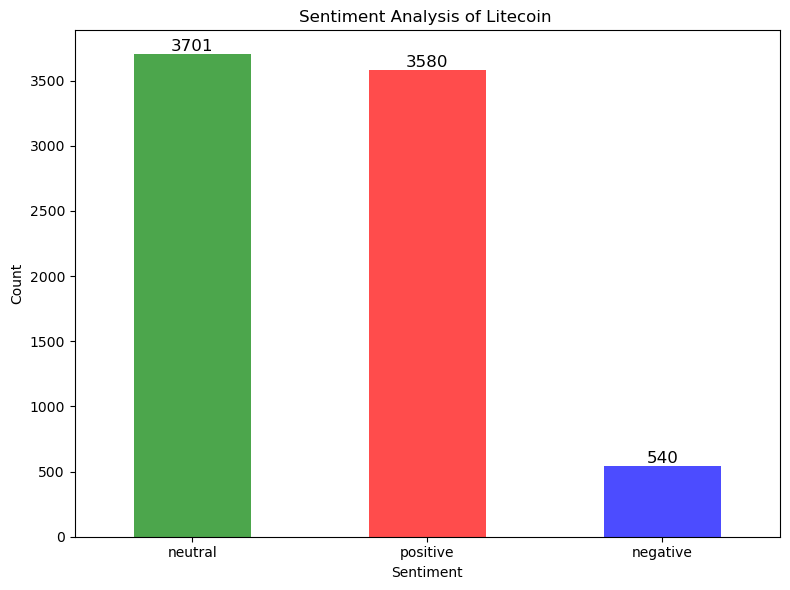

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already performed sentiment analysis and have a DataFrame 'sentiments_df'
# with a 'Sentiment' column containing sentiment labels (positive, negative, neutral)

# Count the occurrences of each sentiment label
sentiment_counts = sentiments_df['Sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Analysis of Litecoin ')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with counts
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Emotion Analysis¶

In [27]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load the pre-trained emotion classification model and tokenizer
model_name = "michellejieli/emotion_text_classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Combine both comments and submissions text into a single list
Monero_text = Monero_submissions_df['selftext'].dropna().tolist() + Monero_comments_df['body'].dropna().tolist()


In [ ]:
def get_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).item()
    
    # Define the emotion labels corresponding to model output
    emotion_labels = ["anger", "fear", "joy", "sadness", "surprise"]
    return emotion_labels[predicted_class]

In [ ]:
Monero_combined_df['emotion'] = combined_text.apply(get_emotion)